In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Joins
Recall the formatting of **apply** from last lecture:

In [ ]:
table_name.apply(one_arg_function, 'column_label') # One argument

We can do similar thing to multiple column:

In [ ]:
table_name.apply(two_arg_function, 
                'column_label_for_first_arg',
                'column_label_for_second_arg')

**apply** called with only a function applies it to each row.

We're going to return to Galton's table from previous lecture:

In [2]:
galton = Table.read_table('galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


In [4]:
heights = galton.select(3, 7).relabel(0, 'MidParent').relabel(1, 'Child')
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


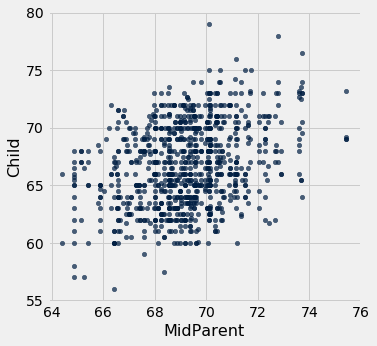

In [5]:
heights.scatter(0) # The first argument of scatter is the x-axis

We'll take the first row:

In [6]:
galton.row(0)

Row(family='1', father=78.5, mother=67.0, midparentHeight=75.43, children=4, childNum=1, gender='male', childHeight=73.2)

and then take the father's height from that first row:

In [7]:
galton.row(0).item('father')
# Or you can use galton.row(0).item(1)

78.5

We can also check the **length** of that row:

In [8]:
len(galton.row(0))

8

In [10]:
# Assign that first row to the name 'first'
first = galton.row(0)
# Grab mother's height and assign it to the name 'm'
m = first.item('mother')
# Grab father's height and assign it to the name 'f'
f = first.item('father')
# Take the average of father and mother
(m + f) / 2

72.75

If we go back to our galton table, we'll see that the first row's **midParent** height is 75.43, not 72.75! Did we do something wrong?

It turns out when Galton made this analysis, he made so that the mother's weight is more significant by 8% compared to father's weight.

In [11]:
(1.08 * m + f)/2

75.43

We can do the same thing to 2nd row, 3rd row, etc.

In [6]:
# Assign that first row to the name 'first'
second = galton.row(1)
# Grab mother's height and assign it to the name 'm'
m = second.item('mother')
# Grab father's height and assign it to the name 'f'
f = second.item('father')
# Take the average of father and mother
(1.08* m + f) / 2

75.43

However, if we do the same thing to all the rows, that will be a lot of repetitions! Instead, we can just define a function and apply it to the columns!

In [7]:
def mid_parent(m, f):
    return (1.08 * m + f) / 2

Here we test the function if it works:

In [8]:
# Assign that first row to the name 'first'
first = galton.row(0)
# Grab mother's height and assign it to the name 'm'
m = first.item('mother')
# Grab father's height and assign it to the name 'f'
f = first.item('father')
mid_parent(m, f)

75.43

And indeed it works! Now we're going to apply it to our first 10 row of Galton's table.

In [10]:
galton.take(np.arange(10)).apply(mid_parent, 'mother', 'father')

array([75.43, 75.43, 75.43, 75.43, 73.66, 73.66, 73.66, 73.66, 72.06,
       72.06])

Note that the number of argument for **apply** has to match the number of arguments required by the function. Otherwise, it'll give an error!

In [11]:
galton.take(np.arange(10)).apply(mid_parent, 'mother')

TypeError: mid_parent() missing 1 required positional argument: 'f'

# Grouping Rows
The **group** method aggregates all rows with the same value for a column into a single row in the result.
* 1st argument: Which column to group by
* 2nd argument: (Optional) how to combine values
    * **len**  : number of grouped values (default)
    * **sum**  : total of all grouped values
    * **list** : list of all grouped values
    
## Classifying by One Variable
Data scientists often need to:
* Classify individuals into groups according to shared features
* Then identify some characteristics of the groups. 

For example, in the example using Galton’s data on heights, we saw that it was useful to: 
* Classify families according to the parents’ midparent heights
* Then find the average height of the children in each group.

This section is about classifying individuals into categories that are not numerical. We begin by recalling the basic use of **group**.

## Counting the Number in Each Category
The **group** method with a single argument counts the number of rows for each category in a column. The result contains one row per unique value in the grouped column.

Here we analyze data on a table of ice creamcones. The group method can be used to list the distinct flavors and to count each flavor.

In [2]:
all_cones = Table.read_table('cones.csv')
cones = all_cones.drop('Color').exclude (5) #Drop the color column and take out the 6th row
cones

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,5.25
strawberry,5.25
chocolate,5.25


In [14]:
cones.group('Flavor')

Flavor,count
chocolate,3
strawberry,2


There are two distinct categories, **chocolate** and **strawberry**. The call to group creates a table of counts in each category. The column is called **count** by default, and contains the number of rows in each category.

But what if we wanted the total price of the cones of each different flavor? That’s where the second argument of group comes in.

## Finding a Characteristic of Each Category
The optional second argument of group names the function that will be used to aggregate values in other columns for all of those rows. **For instance, sum will sum up the prices in all rows that match each category**. This result also contains one row per unique value in the grouped column, but it has the same number of columns as the original table.

To find the total price of each flavor, we call group again, with Flavor as its first argument as before. But this time there is a second argument: the function name **sum**.

In [3]:
cones.group('Flavor', sum)

Flavor,Price sum
chocolate,15.25
strawberry,8.8


To create this new table, **group** has calculated the sum of the Price entries in all the rows corresponding to each distinct flavor. The prices in the three chocolate rows add up to $16.55 (you can assume that price is being measured in dollars). The prices in the two strawberry rows have a total of $8.80

The label of the newly created “sum” column is Price sum, which is created by taking the label of the column being summed, and appending the word sum.

Because group finds the sum of all columns other than the one with the categories, there is no need to specify that it has to sum the prices.

To see in more detail what group is doing, notice that you could have figured out the total prices yourself manually. For example, to find the total price of all the chocolate cones, you could start by creating a new table consisting of only the chocolate cones, and then accessing the column of prices:

In [23]:
cones.where('Flavor', are.equal_to('chocolate')).column('Price')

array([4.75, 5.25, 5.25])

In [24]:
sum(cones.where('Flavor', are.equal_to('chocolate')).column('Price'))

15.25

This is what group is doing for each distinct value in Flavor.

In [25]:
# For each distinct value in `Flavor, access all the rows
# and create an array of `Price`

cones_choc = cones.where('Flavor', are.equal_to('chocolate')).column('Price')
cones_strawb = cones.where('Flavor', are.equal_to('strawberry')).column('Price')

# Display the arrays in a table

grouped_cones = Table().with_columns(
    'Flavor', make_array('chocolate', 'strawberry'),
    'Array of All the Prices', make_array(cones_choc, cones_strawb)
)

# Append a column with the sum of the `Price` values in each array

price_totals = grouped_cones.with_column(
    'Sum of the Array', make_array(sum(cones_choc), sum(cones_strawb))
)
price_totals

Flavor,Array of All the Prices,Sum of the Array
chocolate,[4.75 5.25 5.25],15.25
strawberry,[3.55 5.25],8.8


The **sum** in **group** also works for multiple columns:

In [19]:
cones_sugar = cones.with_column('Sugar', make_array(10, 20, 30, 15, 20))

In [20]:
cones_sugar.group('Flavor', sum)

Flavor,Price sum,Sugar sum
chocolate,15.25,70
strawberry,8.8,25


However, if the additional column doesn't contain a number, the outcome of **sum** would be blank.

In [21]:
cones_yes = cones.with_column('Yes', make_array('Yes', 'No', 'Yes', 'Yes', 'No'))
cones_yes

Flavor,Price,Yes
strawberry,3.55,Yes
chocolate,4.75,No
chocolate,5.25,Yes
strawberry,5.25,Yes
chocolate,5.25,No


In [22]:
cones_yes.group('Flavor', sum)

Flavor,Price sum,Yes sum
chocolate,15.25,
strawberry,8.8,


You can replace **sum** by any other functions that work on arrays. For example, you could use **max** to find the largest price in each category:

In [26]:
cones.group('Flavor', max)

Flavor,Price max
chocolate,5.25
strawberry,5.25


## Example: NBA Salaries
The table nba contains data on the 2015-2016 players in the National Basketball Association. We have examined these data earlier. Recall that salaries are measured in millions of dollars.

In [8]:
nba_unrelabeled = Table.read_table('nba_salaries.csv')
nba = nba_unrelabeled.relabel('2015-2016 SALARY', 'SALARY')
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


**How much money did each team pay for its players' salaries?**

The only columns involved are **TEAM** and **SALARY**. We have to group the rows by **TEAM** then sum the **SALARIES** of the groups.

In [30]:
teams_and_money = nba.select('TEAM', 'SALARY')
teams_and_money.group('TEAM', sum)

TEAM,SALARY sum
Atlanta Hawks,69.5731
Boston Celtics,50.2855
Brooklyn Nets,57.307
Charlotte Hornets,84.1024
Chicago Bulls,78.8209
Cleveland Cavaliers,102.312
Dallas Mavericks,65.7626
Denver Nuggets,62.4294
Detroit Pistons,42.2118
Golden State Warriors,94.0851


Here we're going to make a bar chart out of the top 10 salaries by team.

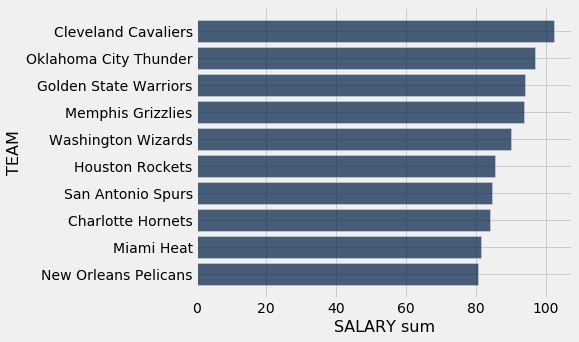

In [37]:
# We can enclose everything in parentheses and combine all the methods in different lines
# so that the code won't be too long
(
    nba.select('TEAM', 'SALARY') #Select just 'TEAM' and 'SALARY' from the original table
    .group('TEAM', sum) #Group the teams and sum of salaries
    .sort('SALARY sum', descending = True) # Sort the rows based on sum of salaries starting the highest
    .take(np.arange(10)) # Take just the top 10 row
    .barh('TEAM') # Create a horizontal bar chart with respect to 'TEAM'
)

**How many NBA players were there in each of the 5 positions?**

We have to classify by POSITION, and count. This can be done with just one argument to group:

In [38]:
nba.group('POSITION')

POSITION,count
C,69
PF,85
PG,85
SF,82
SG,96


**What's the average salary of the players at each of the 5 positions?**

This time, we have to group by POSITION and take the mean of the salaries.

In [39]:
positions_and_money = nba.select('POSITION', 'SALARY')
positions_and_money.group('POSITION', np.mean)

POSITION,SALARY mean
C,6.08291
PF,4.95134
PG,5.16549
SF,5.53267
SG,3.9882


Center was the most highly paid position, at an average of over 6 million dollars.

If we had not selected the two columns as our first step, group would not attempt to “average” the categorical columns in nba. (It is impossible to average two strings like “Atlanta Hawks” and “Boston Celtics”.) It performs arithmetic only on numerical columns and leaves the rest blank.

In [40]:
nba.group('POSITION', np.mean)

POSITION,PLAYER mean,TEAM mean,SALARY mean
C,,,6.08291
PF,,,4.95134
PG,,,5.16549
SF,,,5.53267
SG,,,3.9882


## Grouping By 2 Columns / Cross-Classifying by More than One Variable
When individuals have multiple features, there are many different ways to classify them. For example, if we have a population of college students for each of whom we have recorded a major and the number of years in college, then the students could be classified by major, or by year, or by a combination of major and year.

The **group** method also allows us to classify individuals according to multiple variables.
* Agrregate all rows that share the combination of values in multiple columns
    * 1st argument: A list of which columns to group by
    * 2nd argument: (Optional) how to combine values
    
This is called **cross-classifying**.

### 2 Variables: Counting the Number in Each Paired Category
The table **all_cones** records the flavor, color, and price of 6 ice cream cones.

In [4]:
all_cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


We know how to use **group** to count the number of cones of each flavor:

In [5]:
all_cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


But now each cone has a color as well. To classify the cones by **both flavor and color**, we will pass a list of labels as an argument to group. The resulting table has one row for every unique combination of values that appear together in the grouped columns. As before, a single argument (a list, in this case, but an array would work too) gives row counts.

Although there are six cones, there are only four unique combinations of flavor and color. Two of the cones were dark brown chocolate, and two pink strawberry.

In [7]:
all_cones.group(['Flavor', 'Color'])

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


Now going back to the NBA table,

In [9]:
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


### Challenge Question: Which Team Spends the Most on Starters?

* Each team has 1 starter per position
* Assume the starter for a team & position is the player with the highest salary on that team in that position

In [12]:
# Step 1: group based on TEAM and POSITION
nba.group(make_array('TEAM', 'POSITION'))

TEAM,POSITION,count
Atlanta Hawks,C,3
Atlanta Hawks,PF,2
Atlanta Hawks,PG,2
Atlanta Hawks,SF,2
Atlanta Hawks,SG,5
Boston Celtics,C,3
Boston Celtics,PF,2
Boston Celtics,PG,4
Boston Celtics,SF,2
Boston Celtics,SG,4


In [13]:
# Step 2: Add the second argument 'max'
nba.group(make_array('TEAM', 'POSITION'), max)

TEAM,POSITION,PLAYER max,SALARY max
Atlanta Hawks,C,Walter Tavares,12
Atlanta Hawks,PF,Paul Millsap,18.6717
Atlanta Hawks,PG,Jeff Teague,8
Atlanta Hawks,SF,Thabo Sefolosha,4
Atlanta Hawks,SG,Tim Hardaway Jr.,5.74648
Boston Celtics,C,Tyler Zeller,2.61698
Boston Celtics,PF,Jordan Mickey,5
Boston Celtics,PG,Terry Rozier,7.73034
Boston Celtics,SF,Perry Jones,6.79612
Boston Celtics,SG,Zoran Dragic,3.42551


See above that we get both PLAYER and SALARY max. The PLAYER max is unhelpful since it shows alphabetical max. We need to **select** the tables first before grouping them!

In [15]:
# We'll call this table 'starters'. We're going to use 'starters' later
starters = nba.select('TEAM', 'POSITION', 'SALARY').group(make_array('TEAM', 'POSITION'), max)
starters

TEAM,POSITION,SALARY max
Atlanta Hawks,C,12
Atlanta Hawks,PF,18.6717
Atlanta Hawks,PG,8
Atlanta Hawks,SF,4
Atlanta Hawks,SG,5.74648
Boston Celtics,C,2.61698
Boston Celtics,PF,5
Boston Celtics,PG,7.73034
Boston Celtics,SF,6.79612
Boston Celtics,SG,3.42551


Assume that for each team, the 5 players that make the most money on every position are the starting 5 when the game first starts. Now we want to find the team that pays the most for their starting 5.

In [16]:
starters.group('TEAM', sum)

TEAM,POSITION sum,SALARY max sum
Atlanta Hawks,,48.4181
Boston Celtics,,25.5689
Brooklyn Nets,,47.2192
Charlotte Hornets,,51.9567
Chicago Bulls,,57.8247
Cleveland Cavaliers,,82.3166
Dallas Mavericks,,42.8832
Denver Nuggets,,36.7789
Detroit Pistons,,29.525
Golden State Warriors,,66.6431


Above, we need to do the following:
1. Drop the 'POSITION' column
2. Sort the table based on salary

In [25]:
max_starting5 = starters.drop('POSITION').group('TEAM', sum).sort('SALARY max sum', descending = True)
max_starting5

TEAM,SALARY max sum
Cleveland Cavaliers,82.3166
Oklahoma City Thunder,70.6988
Miami Heat,67.1273
San Antonio Spurs,67.034
Golden State Warriors,66.6431
Houston Rockets,61.2029
Chicago Bulls,57.8247
Los Angeles Lakers,55.8276
New York Knicks,55.0595
Memphis Grizzlies,53.5235


Cleveland Cavaliers pays the most! We can also make a top 10 bar chart out of the table above!

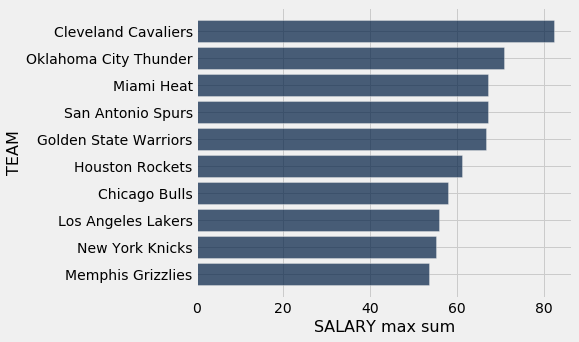

In [26]:
max_starting5.take(np.arange(10)).barh('TEAM')

### 3 or More Variables
You can use **group** to classify rows by 3 or more categorical variables. Just include them all in the list that is the first argument. But cross-classifying by multiple variables can become complex, as the number of distinct combinations of categories can be quite large.

# Pivot Tables: Rearranging the Output of Group
Many uses of cross-classification involve just 2 categorical variables, like **Flavor** and **Color** in the example above. We can display the results of this classification in a **pivot table**. Pivot tables, also known as contingency tables, make it easier to work with data that have been classified according to two variables.

Recall the use of **group** to count the number of cones in each paired category of flavor and color:

In [27]:
all_cones.group(['Flavor', 'Color'])

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


The same data can be displayed differenly using the Table method **pivot**.

In [28]:
all_cones.pivot('Flavor', 'Color')

Color,bubblegum,chocolate,strawberry
dark brown,0,2,0
light brown,0,1,0
pink,1,0,2


Notice how this table displays all nine possible pairs of flavor and color, including “dark brown bubblegum” that don’t exist in our data.

* The group method takes a list of 2 labels because it is flexible: it could take one or three or more
* Pivot always takes 2 column labels, one to determine the columns and one to determine the rows.

The pivot method is closely related to the **group** method: it groups together rows that share a combination of values. It differs from **group** because it **organizes the resulting values in a grid**. 

* 1st argument to **pivot** is the label of a column that contains the values that will be used to form new columns in the result
* 2nd argument is the label of a column used for the rows. 

The result gives the count of all rows of the original table that share the combination of column and row values.

Like group, pivot can be used with additional arguments to find characteristics of each paired category. An optional 3rd argument, **values**, indicates a column of values that will replace the counts in each cell of the grid. All of these values will not be displayed, however; the 4th argument collect indicates how to collect them all into one aggregated value to be displayed in the cell.

Here is an example pivot being used to find the total price of the cones in each cell.

In [29]:
all_cones.pivot('Flavor', 'Color', values='Price', collect=sum)

Color,bubblegum,chocolate,strawberry
dark brown,0,10.5,0
light brown,0,4.75,0
pink,4.75,0,8.8


Compare with the **group** method:

In [30]:
all_cones.group(['Flavor', 'Color'], sum)

Flavor,Color,Price sum
bubblegum,pink,4.75
chocolate,dark brown,10.5
chocolate,light brown,4.75
strawberry,pink,8.8


Though the numbers in both tables are the same, table produced by **pivot** is easier to read and is easier to analyze. The advantage of pivot is that it places grouped values into adjacent columns, so that they can be combined and compared.

### Back to NBA Table

In [31]:
nba.pivot('POSITION', 'TEAM')

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,3,2,2,2,5
Boston Celtics,3,2,4,2,4
Brooklyn Nets,1,3,2,2,5
Charlotte Hornets,3,3,4,2,6
Chicago Bulls,2,2,2,2,4
Cleveland Cavaliers,4,1,3,1,1
Dallas Mavericks,2,2,4,1,2
Denver Nuggets,4,2,2,4,2
Detroit Pistons,3,0,1,4,2
Golden State Warriors,3,3,2,4,2


Above, we can see how many players each team has, categorized by position (There might be missing data here, because it can't be the case that Detroit Pistons doesn't have PF at all).

From the table above, we can see the sum of the salaries:

In [32]:
nba.pivot('POSITION', 'TEAM', values = 'SALARY', collect = sum)

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,22.7563,22.005,9.7634,6,9.04846
Boston Celtics,7.3514,6.17096,19.8986,8.83432,8.03022
Brooklyn Nets,1.3629,13.3575,7.8,26.0806,8.70589
Charlotte Hornets,20.3167,14.0573,17.9412,7.53284,24.2543
Chicago Bulls,20.8488,6.93489,22.3431,3.91632,24.7779
Cleveland Cavaliers,31.0094,19.689,19.6548,22.9705,8.98876
Dallas Mavericks,6.47096,23.827,17.6727,15.3615,2.43035
Denver Nuggets,10.4652,14.05,7.44724,28.7831,1.6839
Detroit Pistons,12.2721,0,13.913,6.86486,9.16176
Golden State Warriors,19.6237,21.5591,16.9145,17.9868,18.001


## Take Home Question
Generate a table of the names of the starters for each team
<img src = 'starters_pivot.jpg'/>

In [49]:
new = nba.pivot('POSITION', 'TEAM', values = 'SALARY', collect = max)

ValueError: The column "POSITION" is not in the table. The table contains these columns: TEAM, C, PF, PG, SF, SG